<a href="https://colab.research.google.com/github/hxchoongh/Machine_Learning/blob/main/tf_hub_CIFAR10_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load the CIFAR-10 dataset
# CIFAR-10 consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class.
# Split into 50,000 training images and 10,000 test images.
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [ ]:
# Normalize the images to a range of 0 to 1 by dividing by 255
# This helps the model converge faster.
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
# Define the class names for CIFAR-10 dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


In [ ]:
# Display some of the training images
def plot_sample_images(images, labels, class_names):
    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i])
        # The CIFAR labels are arrays, so we need the first element
        plt.xlabel(class_names[labels[i][0]])
    plt.show()

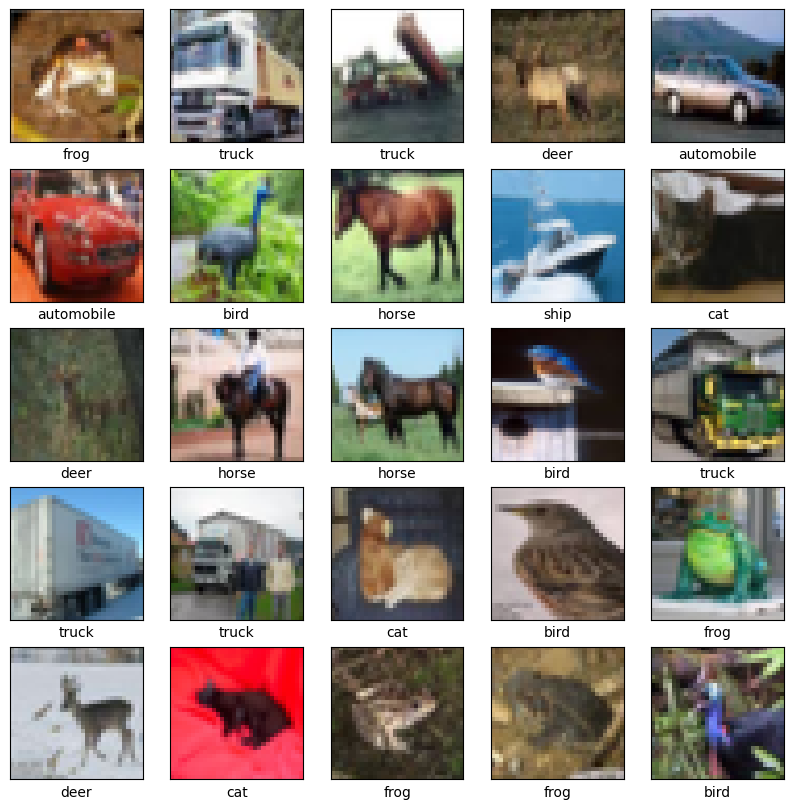

In [ ]:
# Visualizing some sample images from the dataset
plot_sample_images(train_images, train_labels, class_names)

In [ ]:
# Load a pre-trained model (VGG16) trained on ImageNet and fine-tune it for CIFAR-10
# `include_top=False` removes the final classification layer to add a custom layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
# Freeze the base model so its weights won't be updated during training
base_model.trainable = False

In [ ]:
# Add custom layers on top of the base model for CIFAR-10 classification
model = models.Sequential([
    base_model,  # Use VGG16 as the feature extractor
    layers.Flatten(),  # Flatten the 3D output to 1D
    layers.Dense(256, activation='relu'),  # Add a fully connected layer
    layers.Dropout(0.5),  # Add dropout for regularization
    layers.Dense(10, activation='softmax')  # Output layer for 10 CIFAR-10 classes
])

In [ ]:
# Compile the model with Adam optimizer, sparse categorical crossentropy loss, and accuracy metric
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
# Train the model for 10 epochs
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - accuracy: 0.4152 - loss: 1.6473 - val_accuracy: 0.5605 - val_loss: 1.2719
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.5411 - loss: 1.3041 - val_accuracy: 0.5699 - val_loss: 1.2282
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.5597 - loss: 1.2475 - val_accuracy: 0.5812 - val_loss: 1.1970
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.5763 - loss: 1.2153 - val_accuracy: 0.5892 - val_loss: 1.1687
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.5872 - loss: 1.1775 - val_accuracy: 0.5844 - val_loss: 1.1656
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.5945 - loss: 1.1574 - val_accuracy: 0.6026 - val_loss: 1.1420
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.5958 - loss: 1.1522 - val_accuracy: 0.6063 - val_loss: 1.1321
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6015 - loss: 

In [ ]:
# Function to plot training and validation accuracy/loss over epochs
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

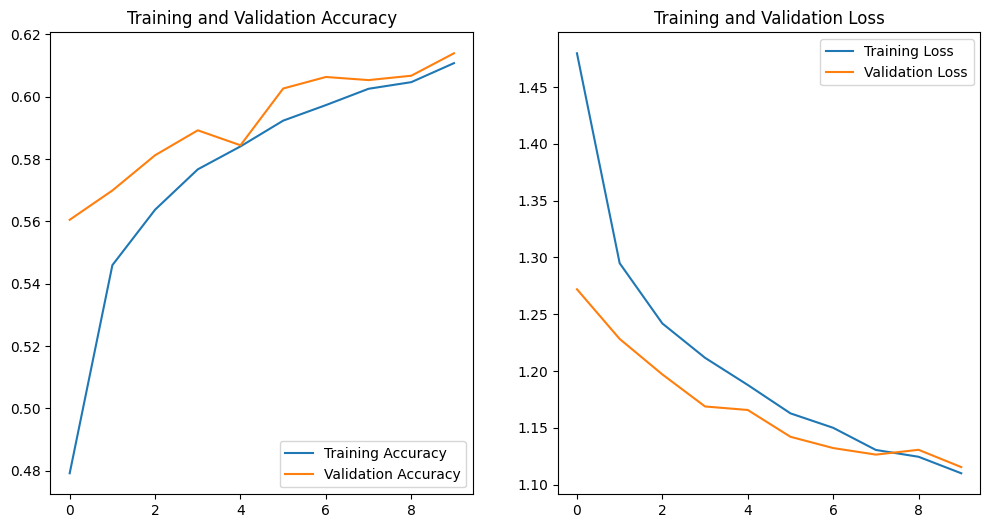

In [ ]:
# Visualize training results
plot_training_history(history)


In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 2s - 7ms/step - accuracy: 0.6139 - loss: 1.1154
Test accuracy: 0.6139000058174133


In [ ]:
# Make predictions on the test set
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


In [ ]:
# Function to display images with predictions
def plot_image_predictions(images, predictions, labels, class_names):
    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i])
        predicted_label = np.argmax(predictions[i])
        true_label = labels[i][0]
        color = 'blue' if predicted_label == true_label else 'red'
        plt.xlabel(f"{class_names[predicted_label]} ({class_names[true_label]})", color=color)
    plt.show()

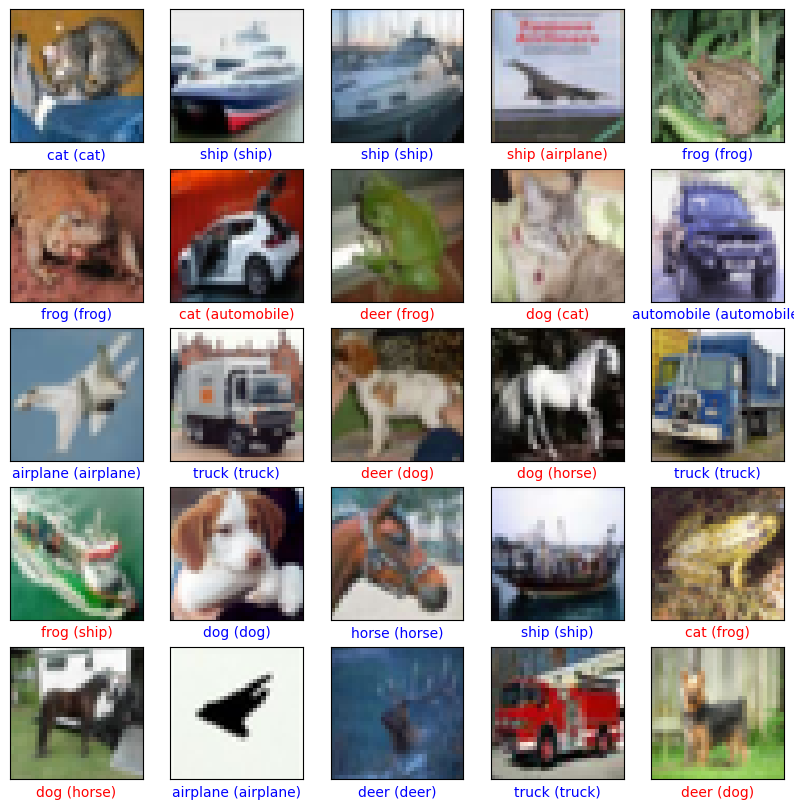

In [ ]:
# Visualizing predictions
plot_image_predictions(test_images, predictions, test_labels, class_names)